In [17]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import librosa
import IPython.display
import librosa.display

In [18]:
print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [19]:
style.use('ggplot')
%matplotlib inline

In [20]:
sample_audio = librosa.util.example_audio_file()
ts, sample_rate = librosa.load(sample_audio)

# Sample Rate
print 'Sample Rate: ', sr

# A numpy array with the timeseries values
print 'Audio Timeseries: ', ts[:10]
print len(y)

Sample Rate:  22050
Audio Timeseries:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1355168


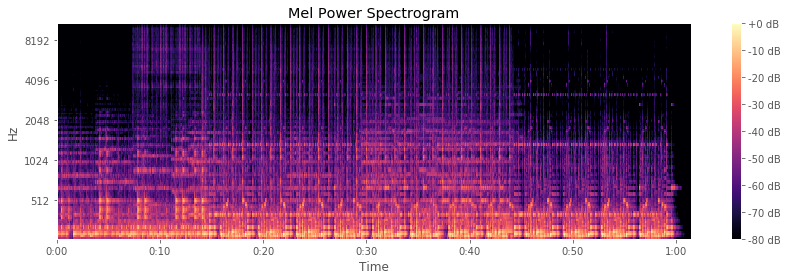

In [21]:
# Create a Mel Spectrogram
spectrogram = librosa.feature.melspectrogram(y, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_spectrogram = librosa.logamplitude(spectrogram, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Mel Power Spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

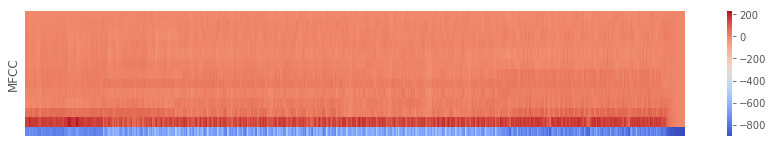

In [24]:
# Extract MFCC features
mfcc = librosa.feature.mfcc(S=log_spectrogram, n_mfcc=13)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

# plt.subplot(3,1,2)
# librosa.display.specshow(delta_mfcc)
# plt.ylabel('MFCC-$\Delta$')
# plt.colorbar()

# plt.subplot(3,1,3)
# librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
# plt.ylabel('MFCC-$\Delta^2$')
# plt.colorbar()

plt.tight_layout()